# ISYE 6402: Module 1.4

## Case Study: Emergency Department Volume

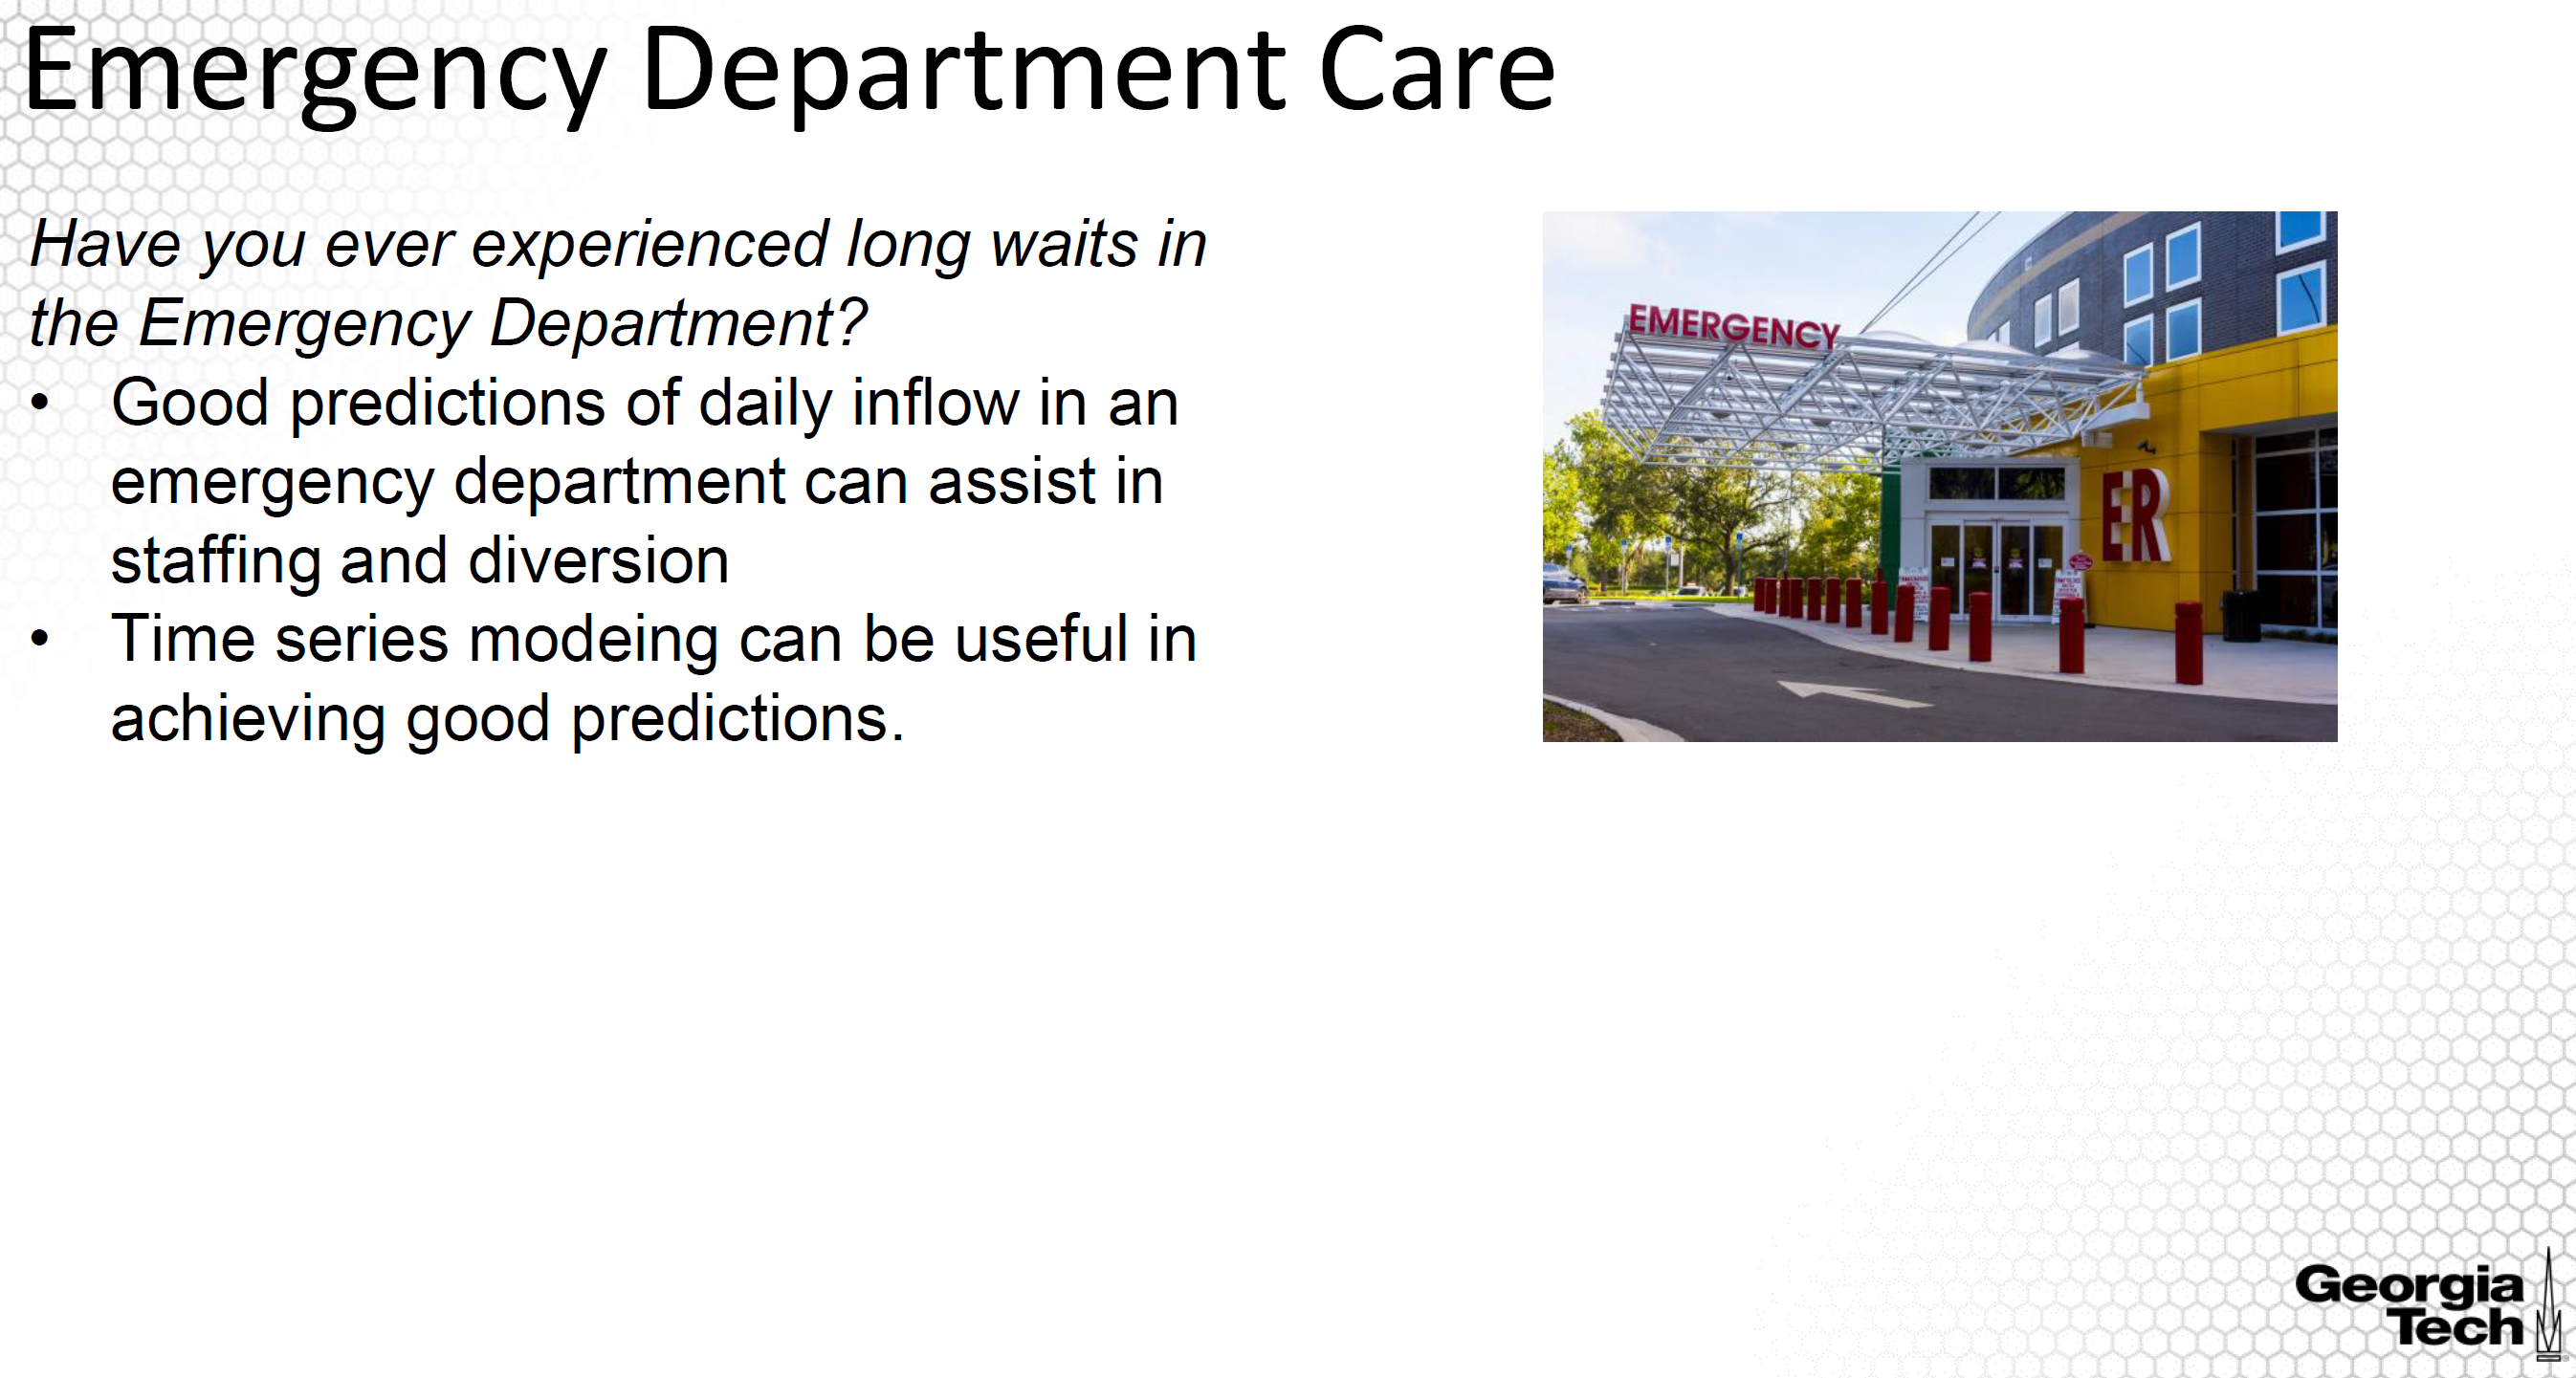

### Case Study Overview

- Time series models can be used to forecast future ED patient visit volume based on the estimated effect of predictor variables. And such forecasts can be useful for active bed and staff management and for facilitating patient flow.

- A number of factors can influence daily ED visits and the patient visits forecasting model should include those factors. Previous studies have shown that ED visits present cyclical variations according to calendar variables such as day of the week, and time of the year. The objective of this analysis is to develop models for identifying temporal patterns and for predicting the volume of patients in an Emergency Department.

- The data consists of daily number of patients seeking ED care in a hospital in Georgia in the United States. The ED volume was observed over a period of more than five years from 2010 until about mid 2015. In the study, we'll only consider temporal factors, although other factors can be used. For example, external factors such as temperature, rainfall, major holidays school season, among others, along with hospital data. For example, the percentage of patients seeking care in ED who have public insurance versus commercial insurance among others.

### Processing Time Data

We'll begin with one important aspect in the time series analysis, processing time or dates of the observed time series data.  The data columns include year, ranging from 2010 to 2015, month, taking value 1 to 12 and day of the month along with the column volume, providing the number of patients seeking care in the ED for the corresponding day. The first three columns provide the complete information on the date of the observations. But, because the information is provided across the three columns, it needs to be converted into one column of dates to be used in visualizing the data.

In [1]:
############# DATA EXPLORATION AND PROCESSING ##########################
edvoldata = read.csv("EDDailyVolume.csv",header=T)
head(edvoldata, 3)

## Process Dates 
year = edvoldata$Year
month = edvoldata$Month
day = edvoldata$Day
datemat = cbind(as.character(day),as.character(month),as.character(year))

head(datemat, 3)

,Year,Month,Day,Volume
,<int>,<int>,<int>,<int>
1,2010,1,1,135
2,2010,1,2,163
3,2010,1,3,139


1,1,2010
2,1,2010
3,1,2010


- To do so, we pull the three columns into one matrix. I define here a function paste.dates which takes as input a vector of three variables: day, month and year. The function returns a date using the information from these three date factors. I apply this function to each row in the date map to output a date for each row in this matrix.

- Last, I converted the dates as output from this R command into dates that R can identify as such, using the as.Date command. This vector of dates will be the input into the visual analytics displays to display time.

In [2]:
paste.dates = function(date){
    day = date[1]; month=date[2]; year = date[3]
    return(paste(day,month,year,sep="/"))
 }
dates = apply(datemat,1,paste.dates)
dates = as.Date(dates, format="%d/%m/%Y")
edvoldata = cbind(dates,edvoldata)
attach(edvoldata)

head(edvoldata, 3)

The following object is masked _by_ .GlobalEnv:

    dates




,dates,Year,Month,Day,Volume
,<date>,<int>,<int>,<int>,<int>
1,2010-01-01,2010,1,1,135
2,2010-01-02,2010,1,2,163
3,2010-01-03,2010,1,3,139


### Exploratory Data Analysis

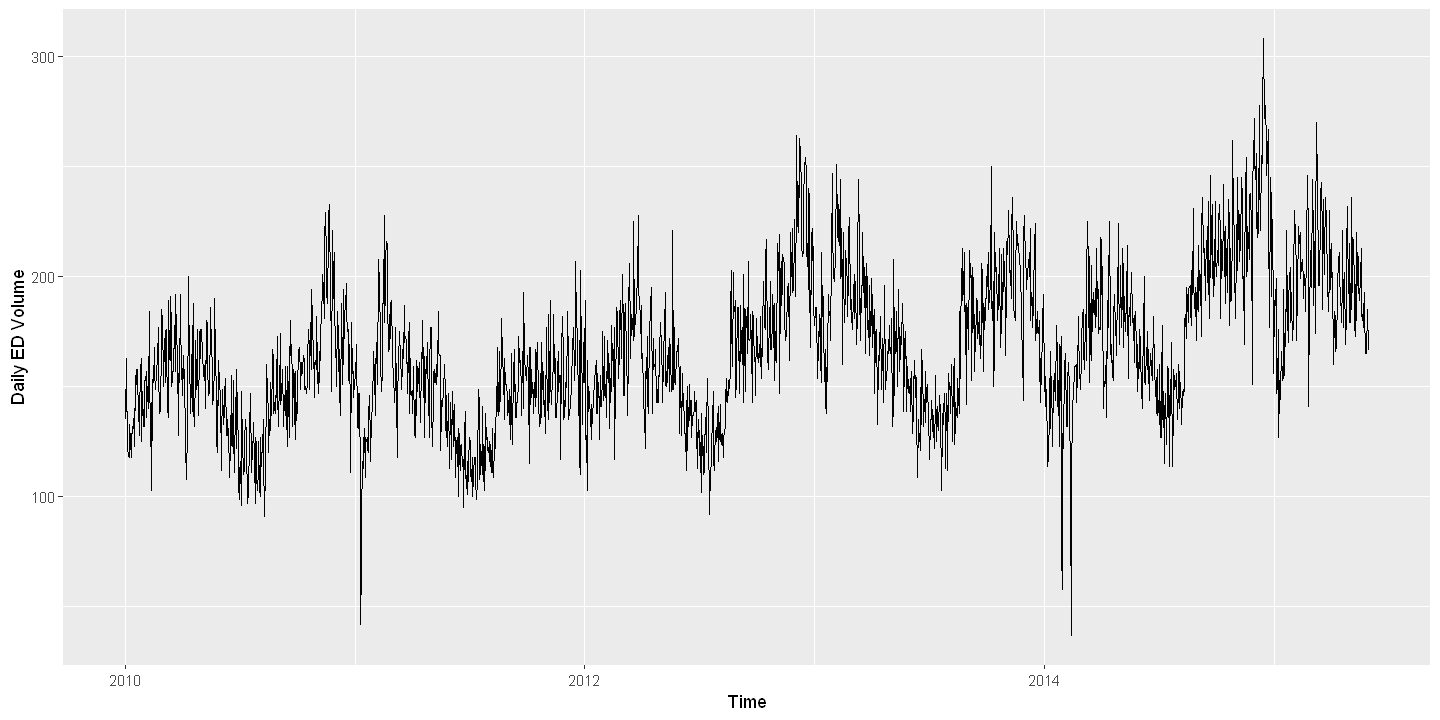

In [3]:
options(repr.plot.width=12, repr.plot.height=6)

library(ggplot2)
ggplot(edvoldata, aes(dates, Volume)) + geom_line() + xlab("Time") + ylab("Daily ED Volume")

First plot of the time series is the plot of the daily ED volume. A few observations to point out are as follows.
- There is a generally increasing trend in the ED volume. 
- There is also a cyclical pattern, although not necessarily a seasonality pattern, since it does not repeat at exact periods of time. 
- There are some clear outliers, for example beginning of 2011 and in 2014

### Count Data Transformation

- Count data within a time unit, such as the number of patients seeking care per day, has a Poisson distribution. 
- To remind you, the mean and variance of the Poisson distribution are equal. Hence, if the mean, represented by the trend and/or seasonality, varies over time so does the variance. 
- The models for estimating the trend and seasonality described in the previous lessons are based on the standard linear regression model, assuming that the response time series is normally distributed. 
- One of the limitations of using the standard linear regression model under normality to model count data is that the variance of the error terms is non constant, and thus, a departure from the model assumptions.
- In order to use this model, we thus need to transform the data using a variance stabilizing transformation. That is, transform the count data, or Poisson distributed data, such that the data have approximately constant variance. The transformation has also the role of normalization of the count data. 

- The classic transformation used for count data is the square root of the counts +3/8. We apply this transformation to the count data or the ED volume and provide the time series analysis on these transformed data.

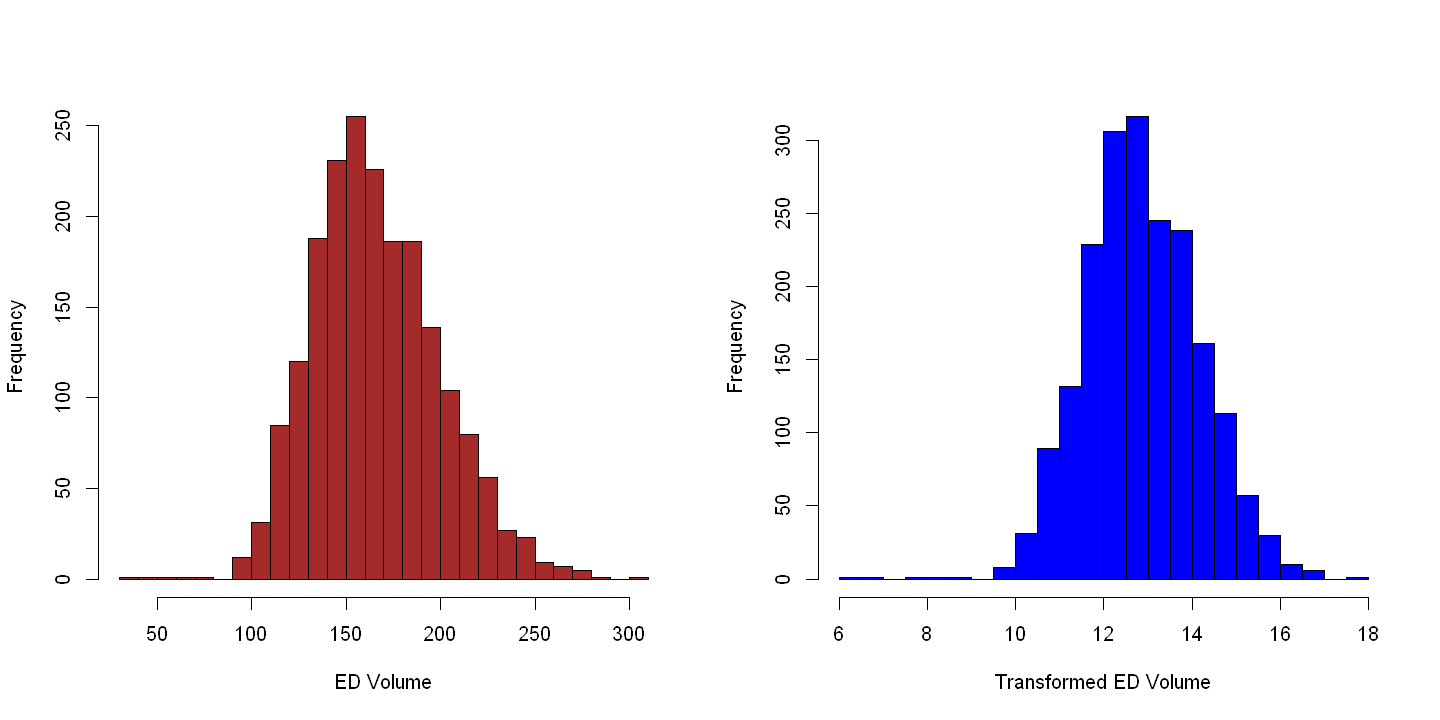

In [4]:
par(mfrow=c(1,2))

## ED Volume is count data: Transform
Volume.tr = sqrt(Volume+3/8)
hist(Volume,nclass=20,xlab="ED Volume", main="",col="brown")
hist(Volume.tr,nclass=20,xlab= "Transformed ED Volume", main="",col="blue")

We next compare the histograms of the ED Volume and the Transformed ED Volume to evaluate the distribution without and with transformation. These are the histograms, the first one is for untransformed and the second one is for the transformed ED Volume data. 

The transformation has also the role of normalization, since with this transformation the distribution is approximately symmetric.

### Compare: With/Without Transformation

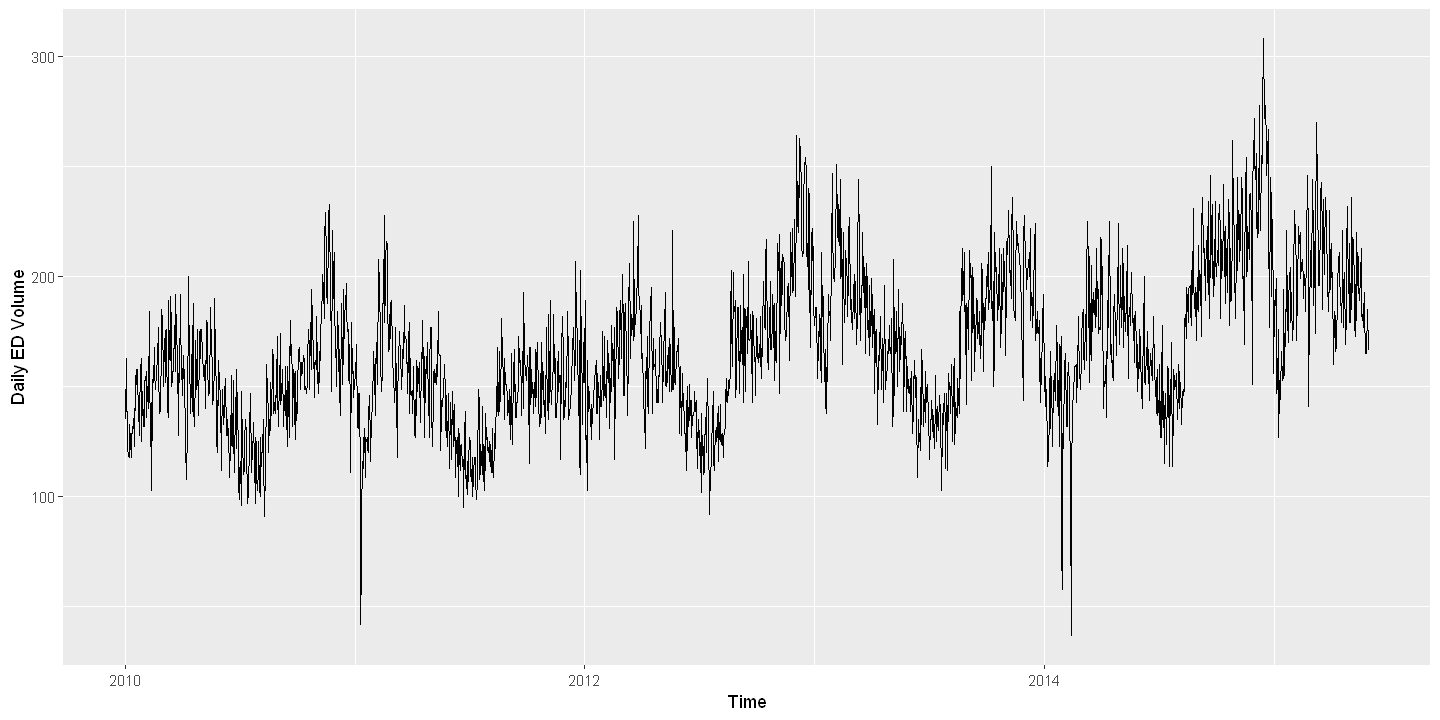

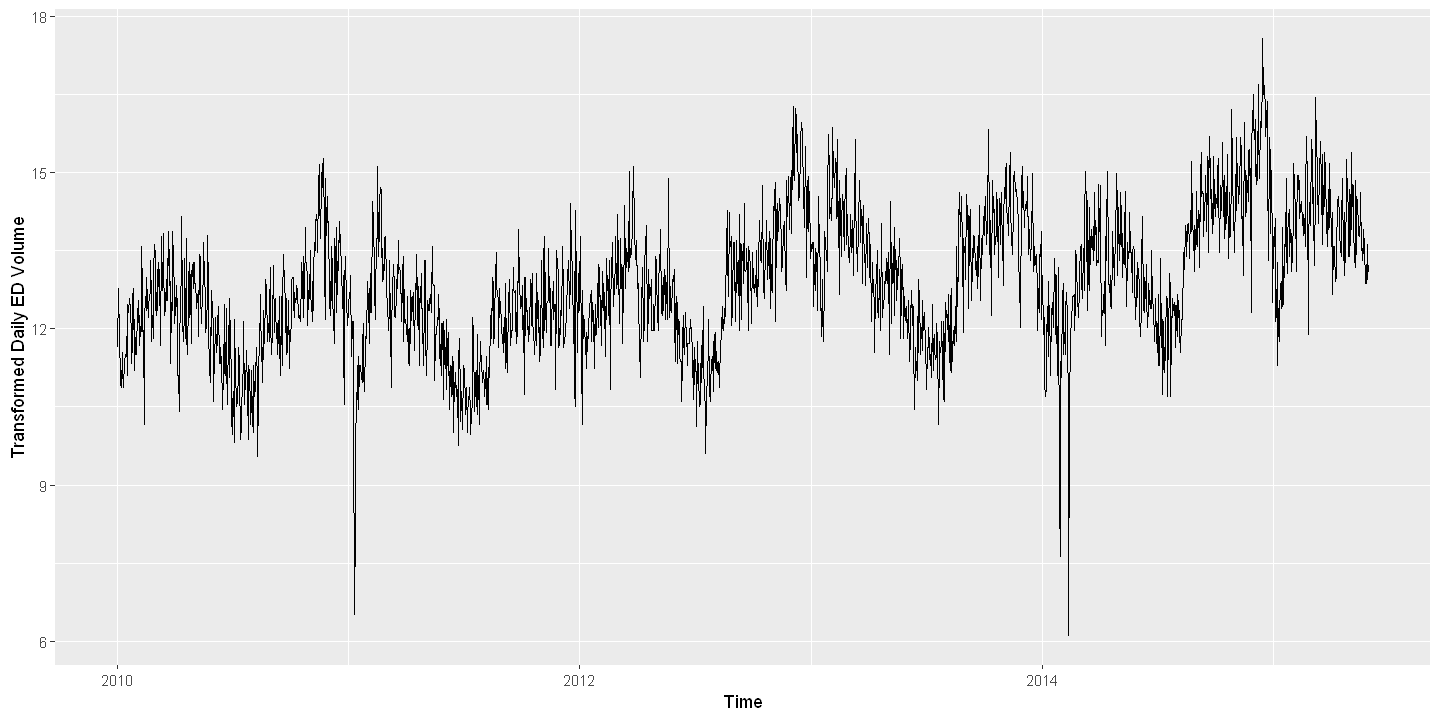

In [5]:
ggplot(edvoldata, aes(dates, Volume)) + geom_line() + xlab("Time") + ylab("Daily ED Volume")
ggplot(edvoldata, aes(dates, sqrt(Volume+3/8))) + geom_line() + xlab("Time") + ylab("Transformed Daily ED Volume")


This slide compares the time series without the transformation in the upper plot versus with transformation in the lower plot.
- The pattern is generally similar with a cyclical trend with outliers at similar time points.
- The main difference is that there is a reduction in the variability.

### Trend Estimation

Let's begin with the estimation of the trend. 
- I applied here only non-parametric estimation approaches, the local polynomial and the Splines Regression methods.
- Here I apply the R commands, the loess() command for local polynomial, and gam() for splines regression

In [6]:
################ TREND AND SEASONALITY ESTIMATION #########################
library(mgcv)

time.pts = c(1:length(Volume))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
## Trend Estimation: Is there a trend?
## Local Polynomial Trend Estimation
loc.fit = loess(Volume.tr~time.pts)
vol.fit.loc = fitted(loc.fit)

## Splines Trend Estimation
gam.fit = gam(Volume.tr~s(time.pts))
summary(gam.fit)
vol.fit.gam = fitted(gam.fit)

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.




Family: gaussian 
Link function: identity 

Formula:
Volume.tr ~ s(time.pts)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.85769    0.02441   526.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.pts) 8.628   8.96 93.09  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.296   Deviance explained = 29.9%
GCV =  1.184  Scale est. = 1.1782    n = 1977

This is the output of the summary of the fit using splines regression. 

First, the p value for the statistical significance of the smooth term of the trend is statistically significant indicating a **statistically non-constant trend**. 

Second, the adjusted R square is 0.296, implying that about 30% of the variability in the ED Volume is explained by the trend alone.

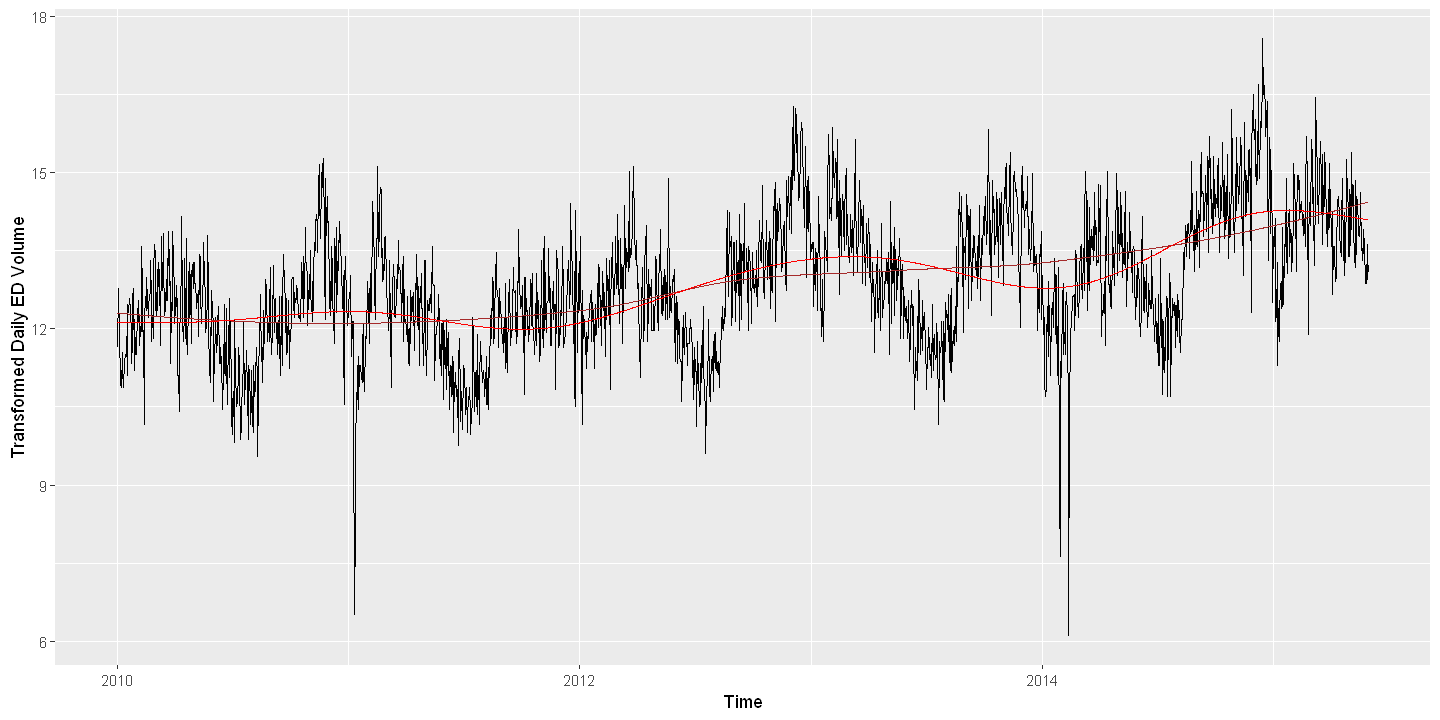

In [7]:
## Is there a trend? 
ggplot(edvoldata, aes(dates, sqrt(Volume+3/8))) + geom_line() + xlab("Time") + ylab("Transformed Daily ED Volume")+
geom_line(aes(dates, vol.fit.loc), color="brown") +
geom_line(aes(dates, vol.fit.gam), color="red")

## Alternative plot coding
#ts.plot(sqrt(Volume+3/8))
#lines(vol.fit.loc, col='blue')
#lines(vol.fit.gam, col='red')

I am overlaying here the estimated trends from the two models applied to the transformed ED volume data. In brown is the local polynomial trend, and in red is the splines regression trend. 

On the slide is the resulting plot. 
- The trends are similar. They both show an increasing pattern over time, with some smooth variations over time. 
- The splines regression trend shows more variation capturing some of the cyclical pattern.

### Trend and Seasonality Estimation

Next, I am applying the seasonal means model along the nonparametric trend estimation. First, I am considering the monthly seasonality. 

In [8]:
## Model Trend + Monthly Seasonality
## Using nonparametric trend and linear regression seasonality 
month = as.factor(format(dates,"%b"))
head(month, 3)

[1] Jan Jan Jan
Levels: Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep

In [9]:
# With Intercept
#gam.fit.seastr.1 = gam(Volume.tr~s(time.pts)+month)
#summary(gam.fit.seastr.1)

# Without Intercept
gam.fit.seastr.1 = gam(Volume.tr~s(time.pts)+month-1)
summary(gam.fit.seastr.1)


Family: gaussian 
Link function: identity 

Formula:
Volume.tr ~ s(time.pts) + month - 1

Parametric coefficients:
         Estimate Std. Error t value Pr(>|t|)    
monthApr 12.86352    0.06200   207.5   <2e-16 ***
monthAug 12.36282    0.06656   185.7   <2e-16 ***
monthDec 13.79996    0.06630   208.1   <2e-16 ***
monthFeb 13.19839    0.06392   206.5   <2e-16 ***
monthJan 12.26440    0.06159   199.1   <2e-16 ***
monthJul 11.32858    0.06643   170.5   <2e-16 ***
monthJun 11.85731    0.06738   176.0   <2e-16 ***
monthMar 13.48473    0.06083   221.7   <2e-16 ***
monthMay 12.91504    0.06159   209.7   <2e-16 ***
monthNov 13.80485    0.06751   204.5   <2e-16 ***
monthOct 13.27839    0.06656   199.5   <2e-16 ***
monthSep 13.09015    0.06769   193.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.pts) 8.777  8.985 140.5  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**'

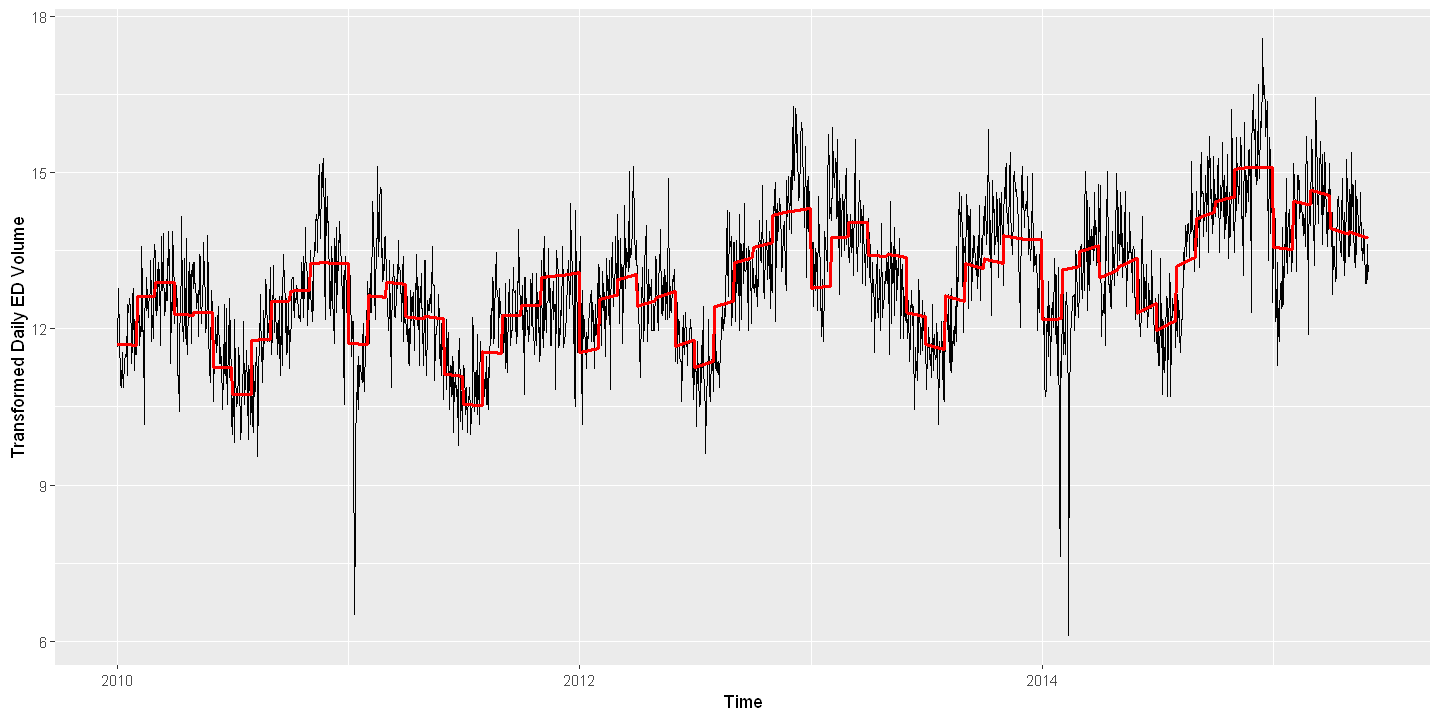

In [10]:
vol.fit.gam.seastr.1 = fitted(gam.fit.seastr.1)
ggplot(edvoldata, aes(dates, sqrt(Volume+3/8))) + geom_line() + xlab("Time") + ylab("Transformed Daily ED Volume")+
geom_line(aes(dates,vol.fit.gam.seastr.1),lwd=1,col="red")
#plot(dates, Volume.tr, type="l", ylab="ED Volume")
#lines(dates, vol.fit.gam.seastr.1, lwd=2, col="red")

From the resulting plot:  
- we can see that the fitted values are a step function. This is because I fitted the seasonal means model. 
- The fitted line in red does capture the trend. However, the seasonality shows differences from the observed data in some places and for some period of time, indicating that there may be more of a cyclical pattern than a monthly seasonality. 
- The monthly cyclical pattern may be more related to other factors than the month seasonality itself. For example, school seasons or flu season may be more predictive of the cyclical pattern.

**Next, I'm adding another layer of seasonality, due to the day of the week.**

It may be expected to see a higher volume in the ED on Sundays, since the physician offices are not open, and because people may have more activities that could lead to injuries and hence, ED visits.

For this, we need to first identify which of the dates correspond to Monday's, which correspond to Tuesday's, and so on. A simple way is to use the **weekdays command in R**, where the input is an object derived using as.Date command.

I'm converting this into a factor to specify this is a categorical variable in the regression model. 

In [11]:
## Add day-of-the-week seasonality
week = as.factor(weekdays(dates))
head(week)

[1] Friday    Saturday  Sunday    Monday    Tuesday   Wednesday
Levels: Friday Monday Saturday Sunday Thursday Tuesday Wednesday

Starting with the model where I fitted the trend and monthly seasonality alone, I'm adding an additional linear term: the categorical variable corresponding to day of the week seasonality

In [12]:
gam.fit.seastr.2 = gam(Volume.tr~s(time.pts)+month+week)
summary(gam.fit.seastr.2)
vol.fit.gam.seastr.2 = fitted(gam.fit.seastr.2)


Family: gaussian 
Link function: identity 

Formula:
Volume.tr ~ s(time.pts) + month + week

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   12.77772    0.07383 173.063  < 2e-16 ***
monthAug      -0.50061    0.08852  -5.655 1.79e-08 ***
monthDec       0.93273    0.08791  10.611  < 2e-16 ***
monthFeb       0.33589    0.08509   3.948 8.17e-05 ***
monthJan      -0.59767    0.08365  -7.145 1.26e-12 ***
monthJul      -1.53530    0.08831 -17.385  < 2e-16 ***
monthJun      -1.00553    0.08880 -11.324  < 2e-16 ***
monthMar       0.61815    0.08272   7.472 1.18e-13 ***
monthMay       0.05271    0.08272   0.637  0.52403    
monthNov       0.94163    0.08900  10.580  < 2e-16 ***
monthOct       0.41557    0.08849   4.696 2.84e-06 ***
monthSep       0.22391    0.08935   2.506  0.01229 *  
weekMonday     0.57169    0.06647   8.601  < 2e-16 ***
weekSaturday   0.04589    0.06641   0.691  0.48967    
weekSunday     0.17538    0.06641   2.641  0.00834 ** 
w

Also provided is a portion of the summary output of the model including non-parametric trend along with the two layers of seasonality. 

- The first portion of the output shows the estimated coefficients for the monthly seasonality. In the first column we have the estimated coefficients, in the second column we have the standard errors, and in the last column we have the p-values for statistical significance. From this output we find that most of the regression coefficients corresponding to the monthly effect are statistically significant given the day of the week's seasonality and the non-parametric trend in the model.

- The second portion of the model output shows estimated coefficients along with the p values for statistical inference for the day of the week seasonality. From this output we find that some of the regression coefficients corresponding to the day of the week effect are statistically significant given that monthly seasonality and the non-parametric trend are in the model. The output for the trend also shows statistical significance of the smooth component given the seasonality in the model. 

- Last, the R squared is 0.627, or 62.7% of the variability in the time series is explained by the trend and the two layers of seasonality. This is to be compared to 0.296, the r square for the model where only the trend was fitted.

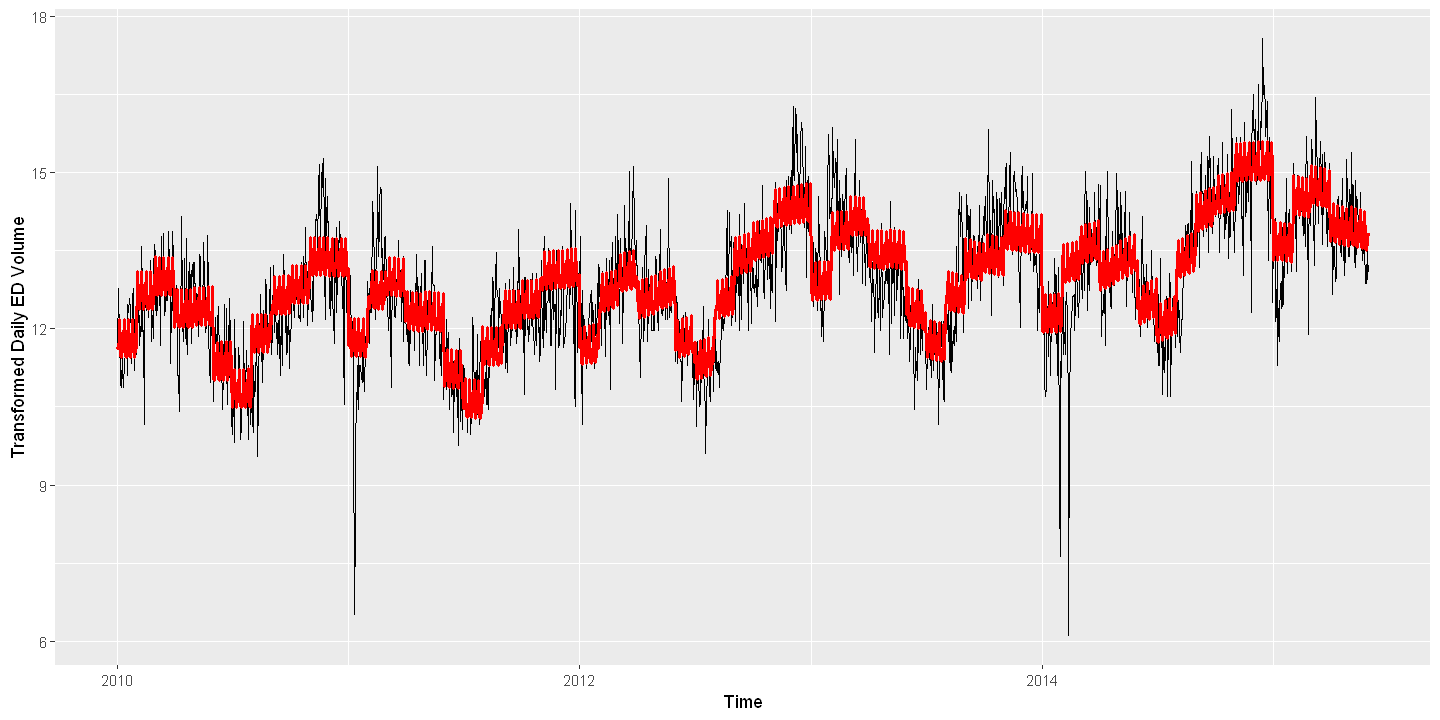

In [13]:
## Compare the two fits: with & without day-of-the-week seasonality
ggplot(edvoldata, aes(dates, sqrt(Volume+3/8))) + geom_line() + xlab("Time") + ylab("Transformed Daily ED Volume")+
geom_line(aes(dates,vol.fit.gam.seastr.2),lwd=1,col="red")

From the plot - The fitted line including both monthly and day of the week seasonality, clearly shows the added seasonality to the day of the week. 

Altogether, estimated simultaneously, the monthly seasonality is picked up somewhat better.

### Does the addition of seasonality of day of the week adds predictive power?

From the previous output, we found that for both layers of seasonality, there is statistical significance for some of the regression coefficients. The question that we will address next is: Does the day of the week seasonality add predictive power to the model? For this, we will compare the models without and with this layer of seasonality. I thus **fitted a linear regression model with both layers of seasonality, and the model with only monthly seasonality, and compare them using the partial F-test through the command anova() in R.** The input in this command consists of the two models. 

In [14]:
## Does the addition of seasonality of day of the week adds predictive power?
lm.fit.seastr.1 = lm(Volume.tr~month)
lm.fit.seastr.2 = lm(Volume.tr~month+week)
anova(lm.fit.seastr.1,lm.fit.seastr.2)
vol.fit.lm.seastr.2 = fitted(lm.fit.seastr.2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1965,2169.875,NA,NA,NA,NA
2,1959,2071.048,6,98.82605,15.57989,1.543093e-17


The output of the anova command is above. 
- **The p-value of the test is very small, indicating that we reject the null hypothesis that the simpler model with monthly seasonality only is as good as the one with both layers of seasonality,** 
- suggesting that both the monthly seasonality and the day-of-the-week seasonality explain the variability in the ED volume

### Seasonality vs Trend

I'm also comparing the fitted regressions without and with trend to assess whether the trend adds any additional predictive power.

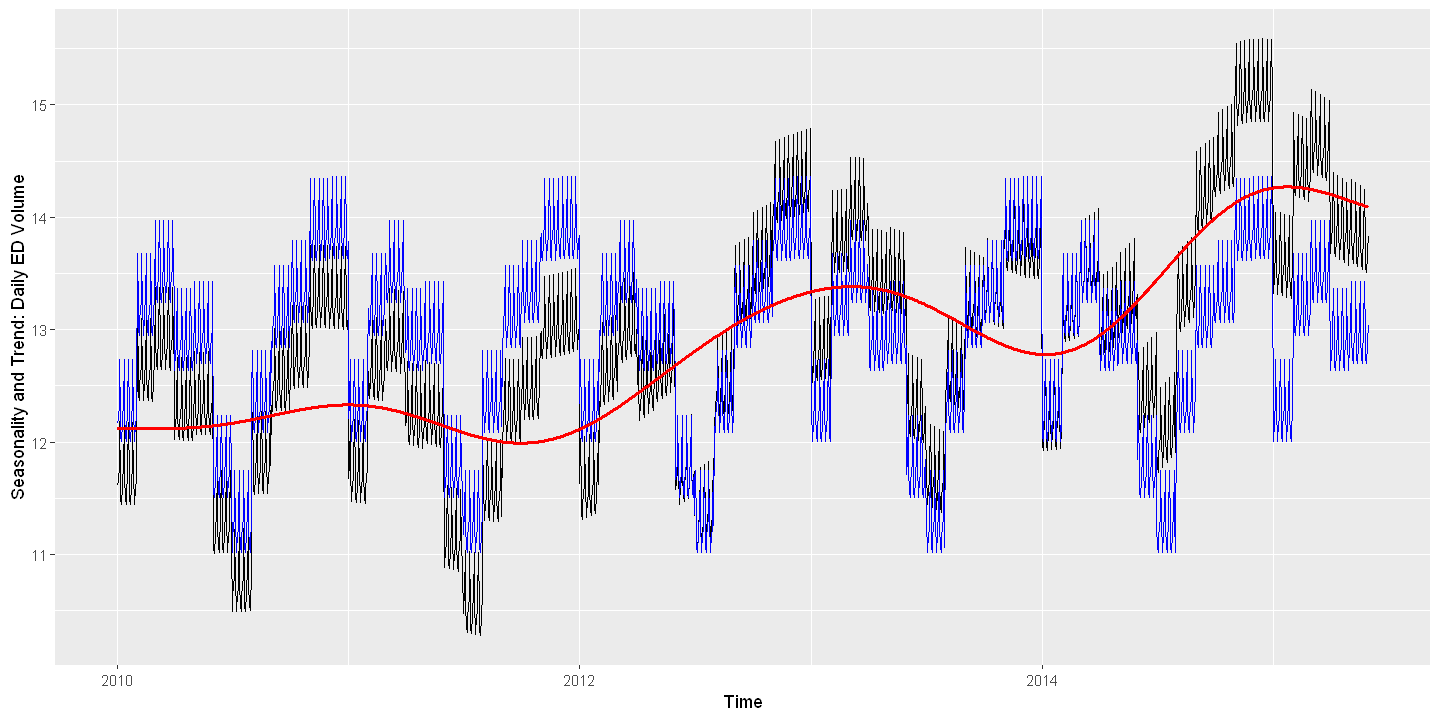

In [15]:
## Compare with & without trend
ggplot(edvoldata, aes(dates, vol.fit.gam.seastr.2)) + geom_line() + xlab("Time") + 
ylab("Seasonality and Trend: Daily ED Volume")+
geom_line(aes(dates,vol.fit.lm.seastr.2), color="blue") +
geom_line(aes(dates, vol.fit.gam), lwd=1, color="red")

- In black, it is the fitted regression for the full model, 
- the one in blue is for seasonality with the two layers of seasonality excluding the trend, and 
- the one in red is the fitted trend alone. 

The trend does affect the fit significantly, thus the full model provides the best representation of the nonstationary components of the time series represented by ED volume.

### Stationarity of ED Volume Time Series

### Residual Process

Here we'll compare three residual processes.
- First, it is the residual process after removing the trend alone. 
- Second is a time series after removing seasonality, including monthly and day of the week. 
- Third, it is the residual time series removing both trend and seasonality. 

The first R commands are to obtain these three residual time series. 

- Next, I define the minimum and maximum values across all three processes in order to plot those time series on the same scale.
- The next set of R commands plots all three residual time series overlaying them into one plot.

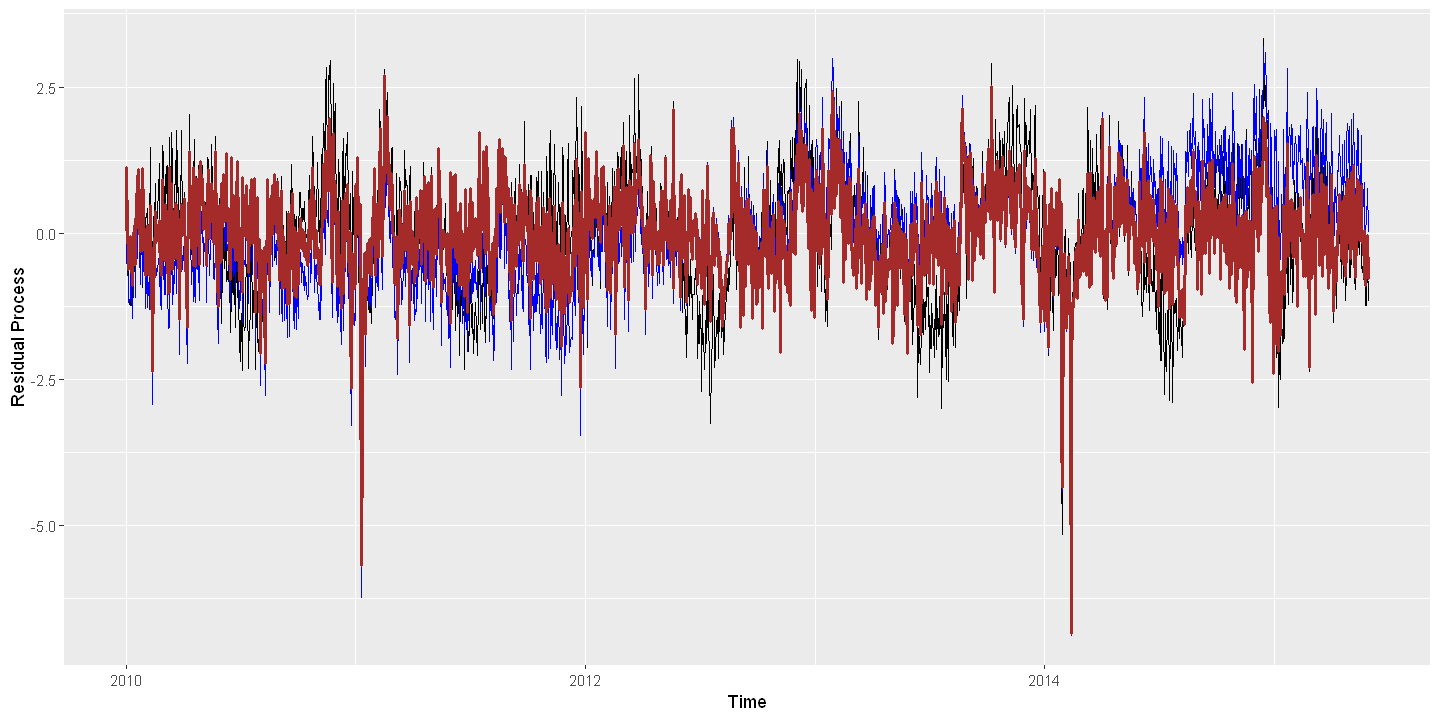

In [16]:
################## STATIONARITY: RESIDUAL PROCESS ####################
## Residual Process: Trend Removal
resid.1 = Volume.tr-vol.fit.gam
## Residual Process: Stationarity Removal
resid.2 = Volume.tr-vol.fit.lm.seastr.2
## Residual Process: Trend & Stationarity Removal
resid.3 = Volume.tr-vol.fit.gam.seastr.2
y.min = min(c(resid.1,resid.2,resid.3))
y.max = max(c(resid.1,resid.2,resid.3))

ggplot(edvoldata, aes(dates, resid.1),ymin=y.min,ymax=y.max) + geom_line() + xlab("Time") + ylab("Residual Process")+
  geom_line(aes(dates,resid.2), color="blue") +
  geom_line(aes(dates, resid.3), lwd=1, color="brown") 
#legend(2012,-3.5,legend=c("Trend","Season","Trend+Season"),lty = 1, col=c("black","blue","brown"))

- In black is the time series after removing the trend alone,
- in blue is the time series after removing the seasonality. 

The time series in black clearly have some non-stationarity patterns while all three have outliers. 

### Residual Process: ACF

To better evaluate the stationarity of a time series, we can instead evaluate the auto-correlation plot of the time series. Here I'm providing the R commands for the sample autocorrelation of all three time series. 

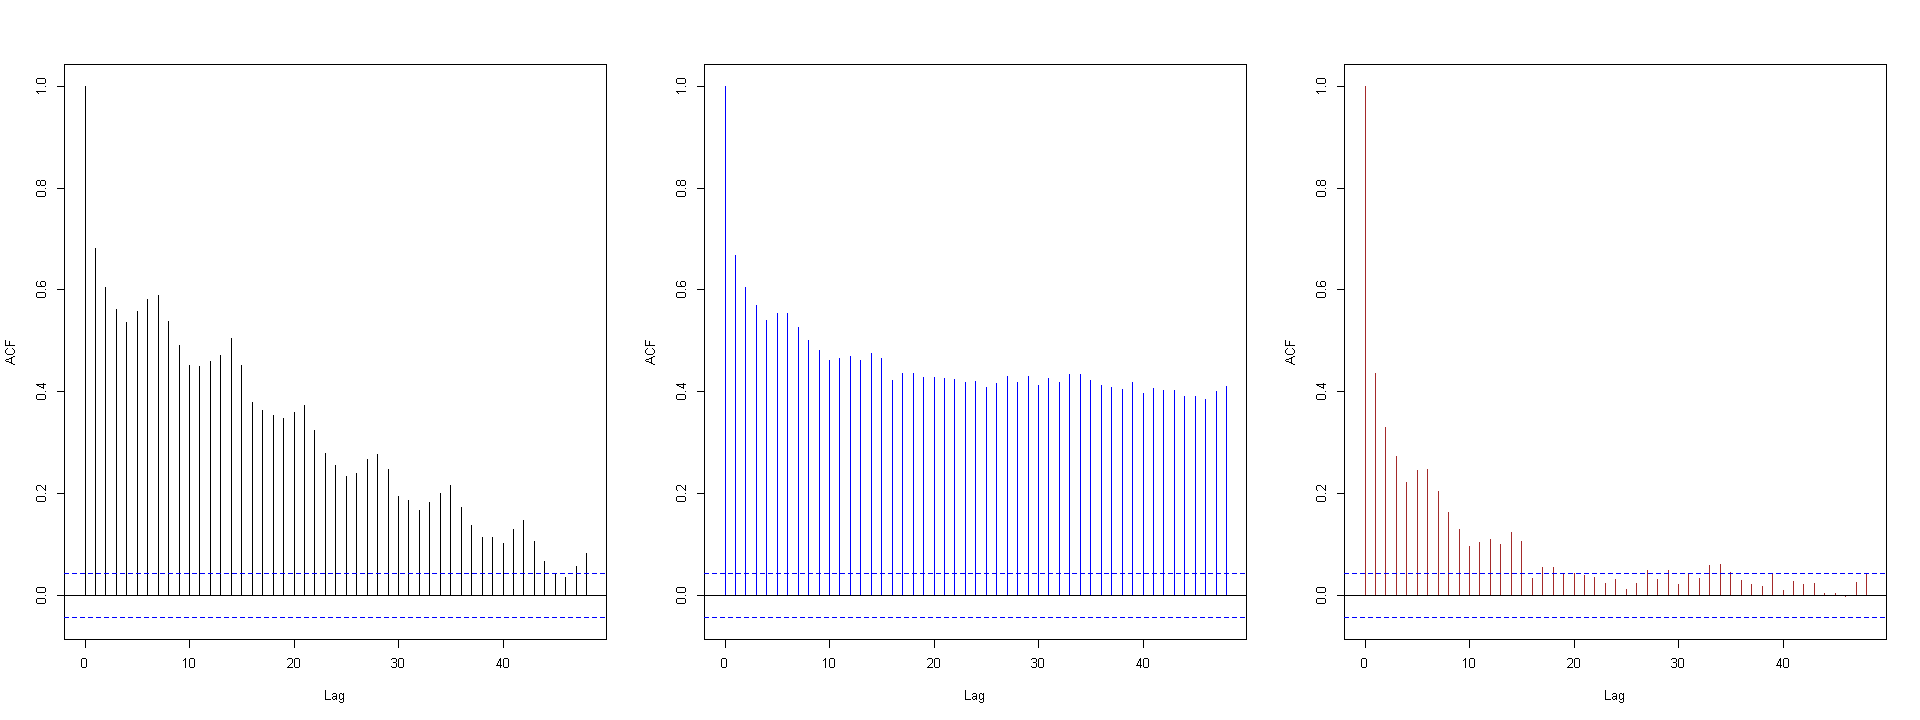

In [17]:
options(repr.plot.width=16, repr.plot.height=6)
par(mfrow=c(1,3))

acf(resid.1,lag.max=12*4,main="")
acf(resid.2,lag.max=12*4,main="",col="blue")
acf(resid.3,lag.max=12*4,main="",col="brown")

- The first plot is for the residual time series after removing only the trend. An indication of non-stationarity is that the sample autocorrelation is large, or outside of significance bands for many large lags. This is the case here. We see that even for a lag of 45 the autocorrelation barely drops within the band. Moreover, we can see a pattern of ups and downs, an indication of seasonality.

- The second plot is for the residual time series after removing the seasonality. While we do not see the cyclical, or the seasonal pattern in the ACF values, the sample autocorrelation decreases slowly, an indication of the presence of a trend in this process.

- Last ACF plot is for the residual time series after removing the seasonality and the trend. The sample ACF values clearly decrease faster than for the previous residual time series with small values within the significance band, starting around the lag 15. This is an indication of possibly a stationary process. We'll expand more on stationarity based on the ACF plot and more rigorous ways to evaluate in the next module of this course.

### Findings

I will conclude with some of the findings from this time series analysis. There is a significant increasing trend in the Emergency Department patient volume over the past five years. Seasonality is more complex, both monthly and day of the week are statistically significant. There are cyclical patterns that may not be fully captured by seasonality. Other cyclical factors, such as flu season, or school season may explain the cyclical pattern.

**This concludes the exploratory analysis of the Emergency Department volume time series.**